In [1]:
import os
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

In [2]:
xs = np.load('/Users/reza/Career/DMLab/SURROGATE/results/laplace/gnn/sphere/exp_2/val_preds/xs.npy')
yhats = np.load('/Users/reza/Career/DMLab/SURROGATE/results/laplace/gnn/sphere/exp_2/val_preds/yhats.npy')
ys = np.load('/Users/reza/Career/DMLab/SURROGATE/results/laplace/gnn/sphere/exp_2/val_preds/ys.npy')
print(xs.shape, yhats.shape, ys.shape)

(69, 14080, 1) (69, 1, 14080, 1) (69, 1, 14080, 1)


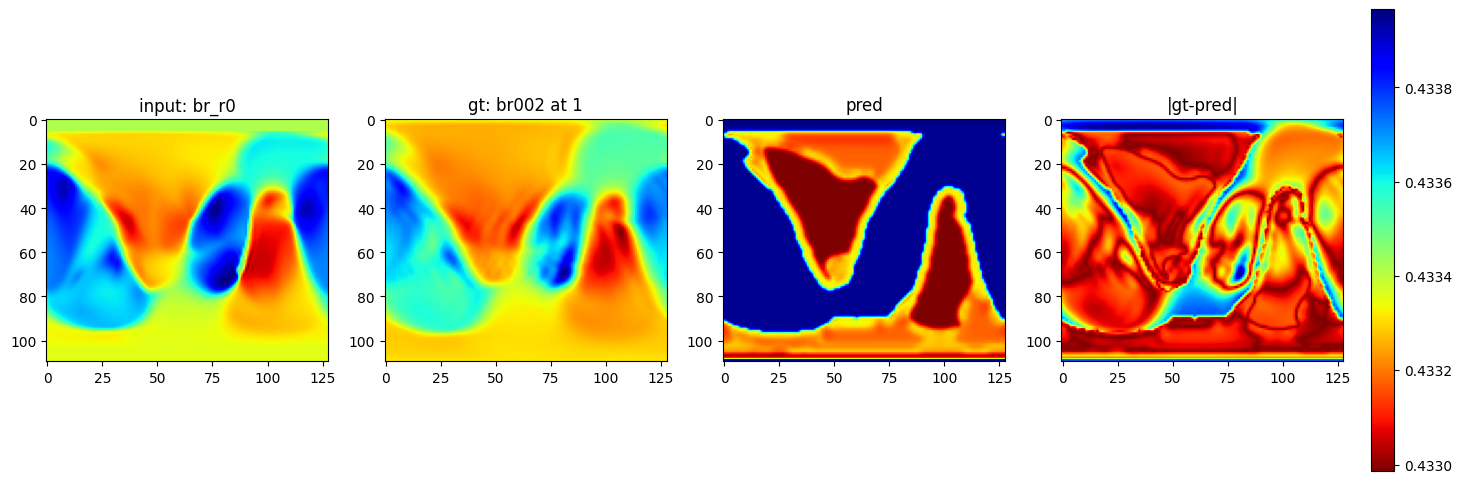

In [6]:
i = 50

inp = xs[i, :, :]
val = ys[i, :, :]
pred = yhats[i, :, :]

inp = inp.reshape(110, 128)
val = val.reshape(110, 128)
pred = pred.reshape(110, 128)

error = np.abs(val-pred)


min_ = min(inp.min(), val.min(), pred.min(), error.min())
max_ = max(inp.max(), val.max(), pred.max(), error.max())

inp = (inp-min_) / (max_-min_)
val = (val-min_) / (max_-min_)
pred = (pred-min_) / (max_-min_)

fig, axes = plt.subplots(1, 4, figsize=(18, 6))
cmap = "jet_r"

# # Plot first subplot
im1 = axes[0].imshow(inp, cmap=cmap)
axes[0].set_title(f"input: br_r0")

# Plot second subplot
im2 = axes[1].imshow(val, cmap=cmap)
axes[1].set_title(f"gt: br002 at 1")

# Plot second subplot
im2 = axes[2].imshow(pred, cmap=cmap)
axes[2].set_title(f"pred")

# Plot second subplot
im2 = axes[3].imshow(error, cmap=cmap)
axes[3].set_title(f"|gt-pred|")

# Create a single colorbar
cbar = fig.colorbar(im1, ax=axes, orientation="vertical", fraction=0.05, pad=0.02)

# plt.tight_layout()
plt.show()

    # plt.show()
    # buf = BytesIO()
    # plt.savefig(buf, format='png')
    # frames.append(imageio.imread(buf))
    # plt.close()